In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_base=pd.read_csv('G:/CDO/DC竞赛/训练集/train_base.csv')

train_label=pd.read_csv('G:/CDO/DC竞赛/训练集/train_label.csv')

train_op=pd.read_csv('G:/CDO/DC竞赛/训练集/train_op.csv')

train_trans=pd.read_csv('G:/CDO/DC竞赛/训练集/train_trans.csv')

test_base=pd.read_csv('G:/CDO/DC竞赛/初赛测试集/test_a_base.csv')

#train_label=pd.read_csv('G:/CDO/DC竞赛/训练集/train_label.csv')

test_op=pd.read_csv('G:/CDO/DC竞赛/初赛测试集/test_a_op.csv')

test_trans=pd.read_csv('G:/CDO/DC竞赛/初赛测试集/test_a_trans.csv')

test1=test_base

#train1= pd.merge(train_label,train_base, on='user')

train1=train_base

In [3]:
train_base.head()

,user,sex,age,provider,level,verified,using_time,regist_type,card_a_cnt,card_b_cnt,...,service3,service3_level,product1_amount,product2_amount,product3_amount,product4_amount,product5_amount,product6_amount,product7_cnt,product7_fail_cnt
0,Train_06800,category 1,24877,category 0,category 2,category 0,24728,category 1,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24706,24706
1,Train_23487,category 1,24895,category 0,category 2,category 0,24719,category 1,24719,24719,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
2,Train_36880,category 0,24853,category 0,category 2,category 0,24723,category 1,24719,24719,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
3,Train_35392,category 0,24938,category 1,category 1,category 0,24707,category 3,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
4,Train_35057,category 0,24956,category 0,category 2,category 0,24728,category 2,24719,24712,...,category 0,NaN,level 2,level 8,level 1,level 0,level 0,level 1,24712,24706


In [4]:
train_label.head() 

,user,label
0,Train_00000,0
1,Train_00001,1
2,Train_00002,0
3,Train_00003,0
4,Train_00004,0


In [5]:
train_op.head() 

,user,op_type,op_mode,op_device,ip,net_type,channel,ip_3,tm_diff
0,Train_36517,b26bc49195bd79cf,87ee0bdf333a54da,92dc8b3f9a9ea13b,bbb0af60b941370b,116a2503b987ea81,4e1ff124e1e6adc8,1e46c177cd9d539a,11 days 09:38:22.000000000
1,Train_36517,b26bc49195bd79cf,87ee0bdf333a54da,92dc8b3f9a9ea13b,bbb0af60b941370b,116a2503b987ea81,4e1ff124e1e6adc8,1e46c177cd9d539a,11 days 09:38:21.000000000
2,Train_36517,b26bc49195bd79cf,87ee0bdf333a54da,92dc8b3f9a9ea13b,bbb0af60b941370b,116a2503b987ea81,4e1ff124e1e6adc8,1e46c177cd9d539a,11 days 09:38:23.000000000
3,Train_36517,b26bc49195bd79cf,87ee0bdf333a54da,92dc8b3f9a9ea13b,bbb0af60b941370b,116a2503b987ea81,4e1ff124e1e6adc8,1e46c177cd9d539a,11 days 09:38:26.000000000
4,Train_36517,b26bc49195bd79cf,87ee0bdf333a54da,92dc8b3f9a9ea13b,bbb0af60b941370b,116a2503b987ea81,4e1ff124e1e6adc8,1e46c177cd9d539a,11 days 09:38:41.000000000


In [6]:
train_trans.head() 

,user,platform,tunnel_in,tunnel_out,amount,type1,ip,type2,ip_3,tm_diff
0,Train_13770,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,185784,45a1168437c708ff,NaN,11a213398ee0c623,NaN,19 days 09:02:45.000000000
1,Train_13770,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,391769,45a1168437c708ff,NaN,11a213398ee0c623,NaN,19 days 09:03:58.000000000
2,Train_08351,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,27740,674e8d5860bc033d,f10a09fe9e522a47,11a213398ee0c623,ee386d6f9fe45d0d,18 days 11:06:49.000000000
3,Train_08351,42573d7287a8c9c2,NaN,6ee790756007e69a,36689,f67d4b5a05a1352a,NaN,NaN,NaN,26 days 09:52:51.000000000
4,Train_08351,42573d7287a8c9c2,NaN,6ee790756007e69a,30746,f67d4b5a05a1352a,NaN,NaN,NaN,26 days 07:50:05.000000000


In [7]:
test_base.head() 

,user,sex,age,provider,level,verified,using_time,regist_type,card_a_cnt,card_b_cnt,...,service3,service3_level,product1_amount,product2_amount,product3_amount,product4_amount,product5_amount,product6_amount,product7_cnt,product7_fail_cnt
0,TestA_21427,category 0,24853,category 0,category 1,category 0,24713,category 1,24719,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
1,TestA_08694,category 1,25011,category 0,category 1,category 0,24743,category 7,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24706,24706
2,TestA_13449,category 1,24877,category 0,category 2,category 0,24744,category 7,24719,24725,...,category 0,NaN,level 2,level 19,level 1,level 0,level 0,level 19,24712,24706
3,TestA_10937,category 0,24925,category 0,category 2,category 0,24715,category 1,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
4,TestA_14194,category 1,24877,category 2,category 1,category 0,24706,category 3,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706


In [8]:
test_op.head()

,user,op_type,op_mode,op_device,ip,net_type,channel,ip_3,tm_diff
0,TestA_12505,22506db3af50317c,22506db3af50317c,6e8d0a0d1b0973ce,db9519d0feafd680,NaN,b2e7fa260df4998d,bd5147d39601285d,12 days 08:43:45.000000000
1,TestA_12505,af1d68e0408f5148,af1d68e0408f5148,6e8d0a0d1b0973ce,db9519d0feafd680,NaN,b2e7fa260df4998d,bd5147d39601285d,12 days 08:43:45.000000000
2,TestA_12505,b26bc49195bd79cf,87ee0bdf333a54da,6e8d0a0d1b0973ce,db9519d0feafd680,b2e7fa260df4998d,6ee790756007e69a,bd5147d39601285d,12 days 08:43:44.000000000
3,TestA_12505,b26bc49195bd79cf,87ee0bdf333a54da,6e8d0a0d1b0973ce,8a6cabe1c344a8bd,b2e7fa260df4998d,6ee790756007e69a,23b92d36f81dc328,10 days 21:59:41.000000000
4,TestA_12505,b88ed7c755c15ecb,b88ed7c755c15ecb,NaN,8a6cabe1c344a8bd,NaN,b2e7fa260df4998d,23b92d36f81dc328,10 days 22:00:18.000000000


In [9]:
test_trans.head() 

,user,platform,tunnel_in,tunnel_out,amount,type1,ip,type2,ip_3,tm_diff
0,TestA_13905,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,2795626,45a1168437c708ff,NaN,11a213398ee0c623,NaN,7 days 11:45:29.000000000
1,TestA_13905,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,73828,443b0fd0860c21b6,dd65674e57e843de,11a213398ee0c623,db4c1a011a487fb4,6 days 10:49:08.000000000
2,TestA_13905,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,73822,674e8d5860bc033d,dd65674e57e843de,11a213398ee0c623,db4c1a011a487fb4,6 days 10:49:53.000000000
3,TestA_13905,46c69cbbce5f1568,b2e7fa260df4998d,6ee790756007e69a,33734,674e8d5860bc033d,dd65674e57e843de,11a213398ee0c623,db4c1a011a487fb4,6 days 10:49:53.000000000
4,TestA_13905,42573d7287a8c9c2,NaN,6ee790756007e69a,27668,f67d4b5a05a1352a,NaN,NaN,NaN,6 days 10:52:01.000000000


In [10]:
test1.head() 

,user,sex,age,provider,level,verified,using_time,regist_type,card_a_cnt,card_b_cnt,...,service3,service3_level,product1_amount,product2_amount,product3_amount,product4_amount,product5_amount,product6_amount,product7_cnt,product7_fail_cnt
0,TestA_21427,category 0,24853,category 0,category 1,category 0,24713,category 1,24719,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
1,TestA_08694,category 1,25011,category 0,category 1,category 0,24743,category 7,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24706,24706
2,TestA_13449,category 1,24877,category 0,category 2,category 0,24744,category 7,24719,24725,...,category 0,NaN,level 2,level 19,level 1,level 0,level 0,level 19,24712,24706
3,TestA_10937,category 0,24925,category 0,category 2,category 0,24715,category 1,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
4,TestA_14194,category 1,24877,category 2,category 1,category 0,24706,category 3,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706


In [11]:
train1.head() 

,user,sex,age,provider,level,verified,using_time,regist_type,card_a_cnt,card_b_cnt,...,service3,service3_level,product1_amount,product2_amount,product3_amount,product4_amount,product5_amount,product6_amount,product7_cnt,product7_fail_cnt
0,Train_06800,category 1,24877,category 0,category 2,category 0,24728,category 1,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24706,24706
1,Train_23487,category 1,24895,category 0,category 2,category 0,24719,category 1,24719,24719,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
2,Train_36880,category 0,24853,category 0,category 2,category 0,24723,category 1,24719,24719,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
3,Train_35392,category 0,24938,category 1,category 1,category 0,24707,category 3,24712,24712,...,category 0,NaN,level 1,level 1,level 1,level 0,level 0,level 1,24712,24706
4,Train_35057,category 0,24956,category 0,category 2,category 0,24728,category 2,24719,24712,...,category 0,NaN,level 2,level 8,level 1,level 0,level 0,level 1,24712,24706


In [16]:
train1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47782 entries, 0 to 47781
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user               47782 non-null  object
 1   sex                47568 non-null  object
 2   age                47782 non-null  int64 
 3   provider           47782 non-null  object
 4   level              47782 non-null  object
 5   verified           47782 non-null  object
 6   using_time         47782 non-null  int64 
 7   regist_type        47782 non-null  object
 8   card_a_cnt         47782 non-null  int64 
 9   card_b_cnt         47782 non-null  int64 
 10  card_c_cnt         47782 non-null  int64 
 11  agreement1         47782 non-null  object
 12  op1_cnt            47782 non-null  int64 
 13  op2_cnt            47782 non-null  int64 
 14  card_d_cnt         47782 non-null  int64 
 15  agreement_total    47782 non-null  int64 
 16  service1_cnt       47782 non-null  int64

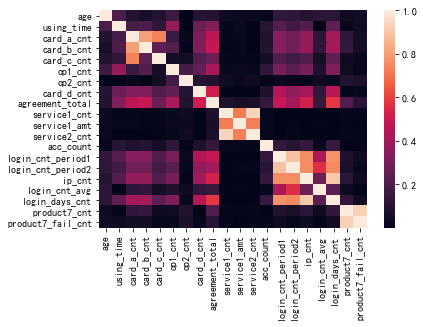

In [17]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
import seaborn as sns
corrmat=train1.corr().abs()
sns.heatmap(corrmat)
plt.show() 

In [20]:
s=[ 'sex','provider', 'level', 'verified', 'regist_type', 'agreement1', 'agreement2', 'agreement3', 'agreement4', 'province', 'city','balance', 'balance_avg', 'balance1', 'balance1_avg', 'balance2', 'balance2_avg', 'service3', 'service3_level', 'product1_amount','product2_amount', 'product3_amount', 'product4_amount', 'product5_amount', 'product6_amount']

from sklearn.preprocessing import LabelEncoder

data=pd.concat([train1,test1],axis=0)

for col in s:

    label= LabelEncoder()

    data[col]=label.fit_transform(data[col].astype(str))#将训练集测试集放一起，一起编码

train1=data.iloc[:47782]#训练集

test1=data.iloc[47782:]#测试集

train1= pd.merge(train_label,train1, on='user')#由于训练集的label与训练集特征不对应，通过该函数将其对应上

s=train1.columns

trainx,valx,trainy,valy=train_test_split(train1[s[2:]],train1[s[1]],test_size=0.05,random_state=2020)#划分验证集

import xgboost as xgb 

params = { 'booster': 'gbtree', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'min_child_weight':18, 'max_depth': 8, 'subsample': 0.75,'colsample_bytree': 0.75,'eta': 0.001,'seed': 2020,'nthread': 36,'silent': True, }#xgboost的参数设置

In [22]:
train_matrix = xgb.DMatrix(trainx,trainy)

valid_matrix = xgb.DMatrix(valx,valy)

watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]

model= xgb.train(params, train_matrix, num_boost_round=24000, evals=watchlist, verbose_eval=500, early_stopping_rounds=1000)#模型训练

testx1 = xgb.DMatrix(test1[s[2:]])

out2=model.predict(testx1,ntree_limit=model.best_ntree_limit)

pd.DataFrame(out2).to_csv('G:/CDO/DC竞赛/1.csv')#预测结果

[20:54:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:1.00000	eval-auc:1.00000
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 1000 rounds.
[500]	train-auc:1.00000	eval-auc:1.00000
[1000]	train-auc:1.00000	eval-auc:1.00000
Stopping. Best iteration:
[0]	train-auc:1.00000	eval-auc:1.00000



KeyError: "['label_y'] not in index"